<a href="https://colab.research.google.com/github/zhesun0304/ECON3916/blob/main/Assignment%202/Econ_3916_Assignment_2_Audit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# DGP Simulations
import numpy as np
normal_traffic = np.random.randint(20, 50, 980)
spike_traffic = np.random.randint(1000, 5000, 20)
latency_logs = np.concatenate([normal_traffic, spike_traffic])

# Step 1.2 -- MAD
def calculate_mad(data):
    x = np.sort(data)
    n = len(x)
    mid = n // 2

    if n % 2 == 1:
        median = x[mid]
    else:
        median = (x[mid - 1] + x[mid]) / 2

    # Making deviations absolute number
    deviations = np.abs(data - median)

    # Median of deviations
    d = np.sort(deviations)
    if n % 2 == 1:
        return d[mid]
    else:
        return (d[mid - 1] + d[mid]) / 2

# Compare SD vs MAD
sd = np.std(latency_logs)
mad = calculate_mad(latency_logs)

print("SD:", sd)
print("MAD:", mad)


SD: 451.2266082757088
MAD: 7.0


### Analysis

SD explodes because it squares deviations. The 20 spike requests are thousands of milliseconds away, so they dominate the calculation even though they are only 2% of the data.

MAD stays stable because it uses medians. Most requests are in the 20 to 50ms range, so the deviation from the median remains small and is not affected by a few extreme spikes.

In [9]:
# Phase 2: The Probability Audit (Topic 5)
def bayesian_audit(prior, sensitivity, specificity):
    numerator = sensitivity * prior
    denominator = (sensitivity * prior) + ((1 - specificity) * (1 - prior))
    return numerator / denominator

# Assign accuracy
sensitivity = 0.98
specificity = 0.98

# Scenario A: Bootcamp
print("Bootcamp:", bayesian_audit(0.50, sensitivity, specificity))

# Scenario B: Econ Class
print("Econ Class:", bayesian_audit(0.05, sensitivity, specificity))

# Scenario C: Honors Seminar
print("Honors Seminar:", bayesian_audit(0.001, sensitivity, specificity))


Bootcamp: 0.98
Econ Class: 0.7205882352941175
Honors Seminar: 0.04675572519083965


In [15]:
# Phase 3: The Bias Audit (Topic 6)
# Assign control user and treatment user numbers
# Observed counts
observed = np.array([50250, 49750])

# Expected counts (50/50 split of 100,000)
expected = np.array([50000, 50000])

# Manual Chi-Square calculation
chi_square = 0
for o, e in zip(observed, expected):
    chi_square += (o - e) ** 2 / e

print("Chi-Square Statistic:", chi_square)

# Decisions:
if chi_square > 3.84:
    print("INVALID experiment: SRM detected")
else:
    print("Valid experiment: No SRM")

Chi-Square Statistic: 2.5
Valid experiment: No SRM


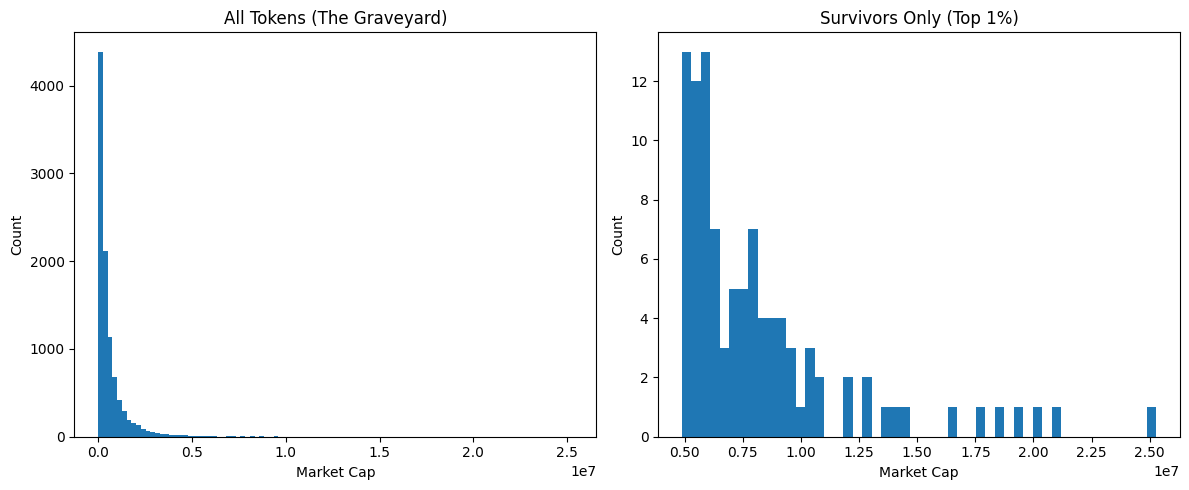

Mean Market Cap (All Tokens): 635995.4254778152
Mean Market Cap (Survivors Only): 8262588.531316816


In [11]:
# Phase 4: AI Expansion (The Co-Pilot Era)
# Prep — Imports & Reproducibility
np.random.seed(42)

# Data Generating Process (Pareto World)
# 10,000 token launches
# Power-law (Pareto) distribution
# Vast majority near zero
# Tiny minority dominate outcomes

n_tokens = 10_000

# Pareto distribution (heavy-tailed)
# alpha > 1 ensures finite mean, still extremely skewed
alpha = 2.5
raw_caps = np.random.pareto(alpha, n_tokens)

# Scale to "market cap"-like numbers
market_caps = raw_caps * 1_000_000

# The Graveyard vs Survivors
df_all = pd.DataFrame({
    "market_cap": market_caps
})

# Top 1% survive (listed, visible, talked about)
threshold = np.percentile(df_all["market_cap"], 99)
df_survivors = df_all[df_all["market_cap"] >= threshold]

# Visualization — Dual Histograms (Truth vs Lie)
plt.figure(figsize=(12, 5))

# Graveyard
plt.subplot(1, 2, 1)
plt.hist(df_all["market_cap"], bins=100)
plt.title("All Tokens (The Graveyard)")
plt.xlabel("Market Cap")
plt.ylabel("Count")

# Survivors
plt.subplot(1, 2, 2)
plt.hist(df_survivors["market_cap"], bins=50)
plt.title("Survivors Only (Top 1%)")
plt.xlabel("Market Cap")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


# Evaluation — The Bias in One Number
mean_all = df_all["market_cap"].mean()
mean_survivors = df_survivors["market_cap"].mean()

print("Mean Market Cap (All Tokens):", mean_all)
print("Mean Market Cap (Survivors Only):", mean_survivors)
